<a href="https://colab.research.google.com/github/hyeminyu828/SOCAR/blob/main/5%ED%8C%80_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

from numpy import asarray
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
socar_zone = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/socar_zone_recommendation.csv')
socar_zone.head()

,reservation_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng
0,19600422,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN
1,19637831,울산광역시 남구,2019-01-01 12:08:55,2018-12-31 16:00:00,25,male,스포티지,우정유료주차장,울산 남구 삼산동 1481-10,35.536034,129.339783,TRANSFER_TERMINAL,TRANSFER_TERMINAL,COMMERCIAL_HOTSPOT,NaN,NaN
2,19670646,경기도 김포시,2019-01-02 17:30:00,2019-01-02 14:50:00,34,male,카니발 11인승,월드애비뉴,경기 김포시 구래동 6880-7,37.645571,126.627879,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN
3,19692831,경기도 남양주시,2019-01-01 20:53:09,2018-12-31 11:00:00,23,male,아반떼AD,제뉴빌딩주차장,경기 남양주시 호평동 642-2,37.654861,127.244576,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,NaN,NaN
4,19728911,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN


데이터 전처리

In [ ]:
# 사용하지 않을 데이터 드롭: 'reservation_id', 'zone_name', 'zone_address', 'zone_lat', 'zone_lng', 'reservation_created_lat', 'reservation_created_lng'
socar_zone = socar_zone.drop(['reservation_id','zone_name','zone_address','zone_lat','zone_lng','reservation_created_lat','reservation_created_lng'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
# age_Categorizing
conditionlist = [
                 (socar_zone['member_age']<30),
                 (socar_zone['member_age']>=30) & (socar_zone['member_age']<40),
                 (socar_zone['member_age']>=40) & (socar_zone['member_age']<50),
                 (socar_zone['member_age']>=50) & (socar_zone['member_age']<60),
                 (socar_zone['member_age']>=60) & (socar_zone['member_age']<70),
                 (socar_zone['member_age']>=70)
                 ]
choicelist = ['20', '30', '40', '50', '60', '70']
socar_zone['age_category']=np.select(conditionlist, choicelist, default='Not specified')


In [ ]:
# car_Categorizing
conditionlist1 = [
             (socar_zone['car_name']=='아반떼AD') | (socar_zone['car_name']=='올뉴K3') | (socar_zone['car_name']=='더뉴아반떼') | (socar_zone['car_name']=='Thule 자전거캐리어 X 더뉴아반떼') | (socar_zone['car_name']=='[쏘카세이브] 아반떼AD'),
             (socar_zone['car_name']=='스포티지') | (socar_zone['car_name']=='투싼(경유)') | (socar_zone['car_name']=='쏘렌토') | (socar_zone['car_name']=='스포티지 더볼드') | (socar_zone['car_name']=='싼타페') | (socar_zone['car_name']=='아이오닉EV (제주)') | (socar_zone['car_name']=='재규어 E-Pace') | (socar_zone['car_name']=='[쏘카세이브] 투싼(경유)'),
             (socar_zone['car_name']=='카니발 11인승') | (socar_zone['car_name']=='휠체어슬로프 X 카니발'),
             (socar_zone['car_name']=='그랜저IG (LPG)') | (socar_zone['car_name']=='그랜저HG') | (socar_zone['car_name']=='그랜저HG (경유)') | (socar_zone['car_name']=='G8'),
             (socar_zone['car_name']=='코나') | (socar_zone['car_name']=='티볼리(경유)') | (socar_zone['car_name']=='티볼리') | (socar_zone['car_name']=='지프 레니게이드') | (socar_zone['car_name']=='스토닉(경유)') | (socar_zone['car_name']=='스토닉') | (socar_zone['car_name']=='Thule 루프박스 X 티볼리') | (socar_zone['car_name']=='QM3') | (socar_zone['car_name']=='트랙스') | (socar_zone['car_name']=='[쏘카세이브] 티볼리(경유)'),
             (socar_zone['car_name']=='클리오') | (socar_zone['car_name']=='프라이드') | (socar_zone['car_name']=='볼트EV (제주)') | (socar_zone['car_name']=='미니클럽맨') | (socar_zone['car_name']=='볼트EV') | (socar_zone['car_name']=='[쏘카세이브] 프라이드'),
             (socar_zone['car_name']=='더뉴레이') | (socar_zone['car_name']=='넥스트스파크') | (socar_zone['car_name']=='올뉴모닝') | (socar_zone['car_name']=='레이') | (socar_zone['car_name']=='모닝') | (socar_zone['car_name']=='펫카시트 X 더뉴레이') | (socar_zone['car_name']=='특가 더뉴레이') | (socar_zone['car_name']=='[쏘카세이브] 레이') | (socar_zone['car_name']=='[쏘카세이브] 넥스트스파크'),
             (socar_zone['car_name']=='말리부') | (socar_zone['car_name']=='SM6') | (socar_zone['car_name']=='쏘나타 뉴라이즈(LPG)') | (socar_zone['car_name']=='K5 (LPG)') | (socar_zone['car_name']=='스팅어') | (socar_zone['car_name']=='쏘나타 뉴라이즈') | (socar_zone['car_name']=='K5') | (socar_zone['car_name']=='2016 말리부') | (socar_zone['car_name']=='LF쏘나타') | (socar_zone['car_name']=='벤츠 C200') | (socar_zone['car_name']=='쏘나타DN8') | (socar_zone['car_name']=='[쏘카세이브] K5') | (socar_zone['car_name']=='[쏘카세이브] K5 (LPG)'),
             (socar_zone['car_name']=='뉴 그랜드스타렉스') | (socar_zone['car_name']=='스타렉스')]

choicelist1 = ['준중형', '중형SUV', '대형MPV', '준대형', '소형SUV', '소형', '경차', '중형', '승합차']


socar_zone['car_category']=np.select(conditionlist1, choicelist1, default='Not Specified')


In [ ]:
# Ordinal Encoding
enc = OrdinalEncoder(dtype=np.float64)
ordinal1 = enc.fit_transform(np.asarray(socar_zone['zone_type1']).reshape(-1,1))
socar_zone['zone_type1'] = ordinal1[:,0]
ordinal2 = enc.fit_transform(np.asarray(socar_zone['zone_type2']).reshape(-1,1))
socar_zone['zone_type2'] = ordinal2[:,0]
ordinal3 = enc.fit_transform(np.asarray(socar_zone['zone_type3']).reshape(-1,1))
socar_zone['zone_type3'] = ordinal3[:,0]
ordinal4 = enc.fit_transform(np.asarray(socar_zone['member_gender']).reshape(-1,1))
socar_zone['member_gender'] = ordinal4[:,0]
ordinal5 = enc.fit_transform(np.asarray(socar_zone['region']).reshape(-1,1))
socar_zone['region_ordinal'] = ordinal5[:,0]

In [ ]:
# 픽업시간, 반납시간을 이용해 실제 이용시간 구하기 (new feature)

time_used = (pd.to_datetime(socar_zone["reservation_return_at"]) - pd.to_datetime(socar_zone["reservation_start_at"])).dt.seconds / 60 / 60
time_used

0          0.061667
1         20.148611
2          2.666667
3          9.885833
4          6.100833
            ...    
751544     1.020556
751545     0.687222
751546     0.621667
751547     0.518889
751548     0.307222
Length: 751549, dtype: float64

In [ ]:
socar_zone["duration"] = time_used
socar_zone.head()

,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_type1,zone_type2,zone_type3,age_category,car_category,region_ordinal,duration
0,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,1.0,아반떼AD,5.0,12.0,12.0,40,준중형,18.0,0.061667
1,울산광역시 남구,2019-01-01 12:08:55,2018-12-31 16:00:00,25,1.0,스포티지,13.0,14.0,0.0,20,중형SUV,23.0,20.148611
2,경기도 김포시,2019-01-02 17:30:00,2019-01-02 14:50:00,34,1.0,카니발 11인승,5.0,0.0,5.0,30,대형MPV,5.0,2.666667
3,경기도 남양주시,2019-01-01 20:53:09,2018-12-31 11:00:00,23,1.0,아반떼AD,5.0,13.0,0.0,20,준중형,6.0,9.885833
4,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,1.0,투싼(경유),6.0,13.0,5.0,30,중형SUV,18.0,6.100833


In [ ]:
socar_zone.fillna(0, inplace=True)
socar_zone.isnull().sum()

region                   0
reservation_return_at    0
reservation_start_at     0
member_age               0
member_gender            0
car_name                 0
zone_type1               0
zone_type2               0
zone_type3               0
age_category             0
car_category             0
region_ordinal           0
duration                 0
dtype: int64

In [ ]:
ordinal8 = enc.fit_transform(np.asarray(socar_zone['car_category']).reshape(-1,1))
socar_zone['car_category'] = ordinal8[:,0]

In [ ]:
socar_zone.head()

,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_type1,zone_type2,zone_type3,age_category,car_category,region_ordinal,duration
0,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,1.0,아반떼AD,5.0,12.0,12.0,40,7.0,18.0,0.061667
1,울산광역시 남구,2019-01-01 12:08:55,2018-12-31 16:00:00,25,1.0,스포티지,13.0,14.0,0.0,20,9.0,23.0,20.148611
2,경기도 김포시,2019-01-02 17:30:00,2019-01-02 14:50:00,34,1.0,카니발 11인승,5.0,0.0,5.0,30,2.0,5.0,2.666667
3,경기도 남양주시,2019-01-01 20:53:09,2018-12-31 11:00:00,23,1.0,아반떼AD,5.0,13.0,0.0,20,7.0,6.0,9.885833
4,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,1.0,투싼(경유),6.0,13.0,5.0,30,9.0,18.0,6.100833


In [ ]:
socar_zone = socar_zone.drop(['region','reservation_return_at','reservation_start_at', 'member_age','car_name'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
socar_zone.head()

,member_gender,zone_type1,zone_type2,zone_type3,age_category,car_category,region_ordinal,duration
0,1.0,5.0,12.0,12.0,40,7.0,18.0,0.061667
1,1.0,13.0,14.0,0.0,20,9.0,23.0,20.148611
2,1.0,5.0,0.0,5.0,30,2.0,5.0,2.666667
3,1.0,5.0,13.0,0.0,20,7.0,6.0,9.885833
4,1.0,6.0,13.0,5.0,30,9.0,18.0,6.100833


In [ ]:
socar_zone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751549 entries, 0 to 751548
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   member_gender   751549 non-null  float64
 1   zone_type1      751549 non-null  float64
 2   zone_type2      751549 non-null  float64
 3   zone_type3      751549 non-null  float64
 4   age_category    751549 non-null  object 
 5   car_category    751549 non-null  float64
 6   region_ordinal  751549 non-null  float64
 7   duration        751549 non-null  float64
dtypes: float64(7), object(1)
memory usage: 45.9+ MB


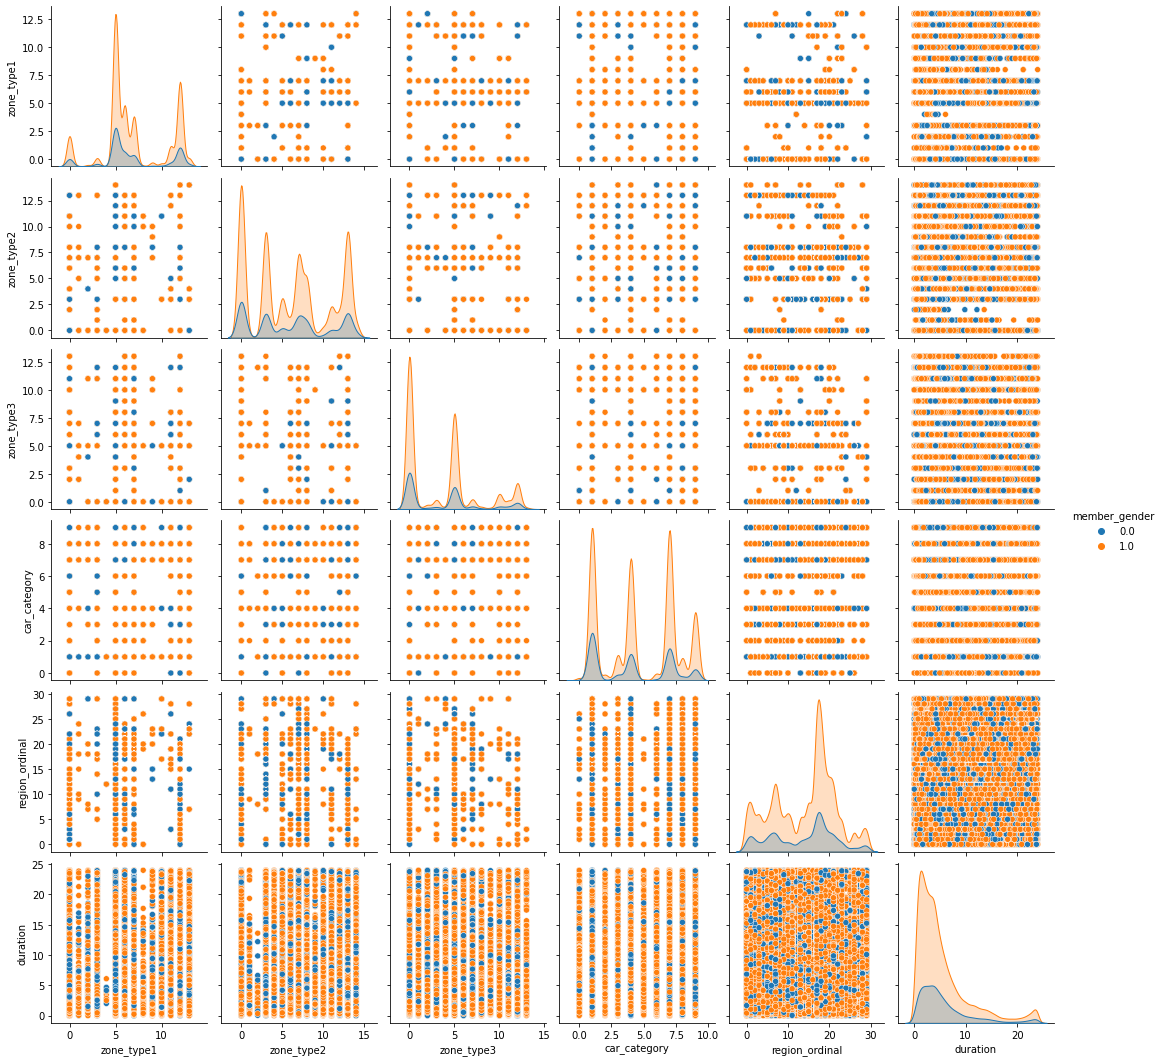

In [ ]:
data = socar_zone.sample(frac=0.3)

import seaborn as sn
sn.pairplot(data, hue="member_gender")
plt.show()

K- means Clustering

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

X_data = np.asarray(data[['car_category', 'region_ordinal']])
y_data = np.asarray(data[['duration']] - 1)

In [ ]:
# import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

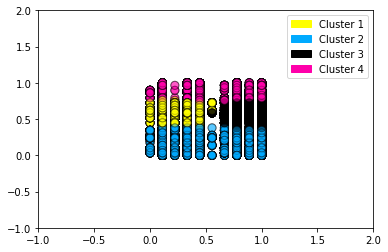

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

X_data_normalized = MinMaxScaler().fit(X_data).transform(X_data)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_data)

plot_labelled_scatter(X_data_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

In [ ]:
# 클러스터 1로 분류된 데이터를 추출해보자
data[ kmeans.labels_ == 0 ]

,member_gender,zone_type1,zone_type2,zone_type3,age_category,car_category,region_ordinal,duration
629035,0.0,6.0,0.0,0.0,50,1.0,19.0,2.148056
350042,1.0,6.0,0.0,10.0,30,2.0,19.0,6.908056
384734,0.0,12.0,3.0,0.0,30,1.0,17.0,20.666667
202916,1.0,12.0,3.0,0.0,40,1.0,17.0,1.881111
400894,1.0,6.0,5.0,5.0,20,4.0,15.0,1.136944
...,...,...,...,...,...,...,...,...
649319,1.0,0.0,7.0,0.0,40,4.0,19.0,6.517778
466154,0.0,5.0,8.0,0.0,40,1.0,13.0,1.424444
533604,1.0,6.0,13.0,10.0,20,4.0,20.0,1.179167
194884,1.0,5.0,8.0,0.0,20,4.0,17.0,13.320556
